In [1]:
import sys
!{sys.executable} -m pip install torch torchvision scipy matplotlib | grep -v 'already satisfied'

In [2]:
# New code - recreate PolyQueryPeacocks

import pathlib
from simcoder.similarity import load_mf_encodings

import ssl
ssl._create_default_https_context = ssl._create_unverified_context # try and avoid SSL error

In [3]:
allData = load_mf_encodings(pathlib.Path("/Volumes/Data/mf_resnet50/")) # load resnet 50 encodings

In [4]:
from scipy.io import loadmat
import numpy as np

def load_mf_softmax():
    basepath = pathlib.Path("/Volumes/Data/mf_softmax/")

    paths = basepath.glob("*.mat")
    paths = sorted(paths, key=lambda p: int(p.stem))
    encodings = [loadmat(p)["probVecs"] for p in paths]
    encodings = np.concatenate(encodings)
    return encodings

In [5]:
smData = load_mf_softmax()
print(smData[1].size)
smData.shape

1000


(1000000, 1000)

In [39]:

from simcoder.count_cats import findHighCatValues

top_indices, top_cats = findHighCatValues(smData) # numpy - the most owly owls etc.
top_cats = top_cats.tolist()  # a python list

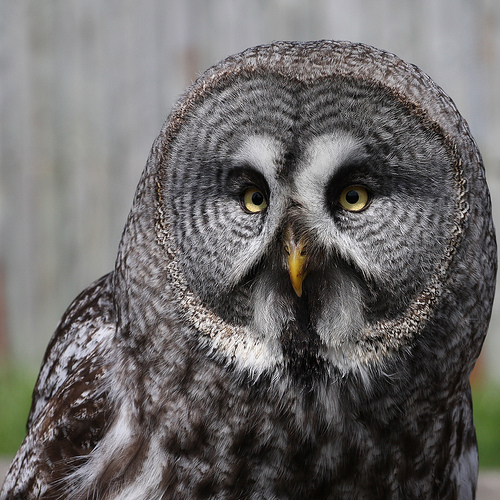

In [30]:
from simcoder.similarity import get_mf_image

get_mf_image(top_indices[0])

In [48]:
# Download ImageNet labels

! if [ -f "imagenet_classes.txt" ]; then echo "File imagenet_classes.txt already exists"; else wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt 2> /dev/null; fi


File imagenet_classes.txt already exists


In [11]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [40]:
for i in range(40):
    print(top_indices[i],smData[top_indices[i],top_cats[i]],top_cats[i],categories[top_cats[i]] )

728040 1.0 24 great grey owl
935868 1.0 565 freight car
173198 1.0 576 gondola
208133 1.0 565 freight car
16781 1.0 958 hay
661331 1.0 340 zebra
855119 1.0 340 zebra
325099 1.0 145 king penguin
735515 1.0 291 lion
588707 1.0 84 peacock
74114 1.0 565 freight car
94196 1.0 15 robin
857743 1.0 291 lion
897381 1.0 87 African grey
94402 1.0 565 freight car
607984 1.0 84 peacock
761419 1.0 145 king penguin
688247 1.0 291 lion
723306 1.0 90 lorikeet
820188 1.0 84 peacock
345893 1.0 565 freight car
587997 1.0 84 peacock
258196 1.0 955 jackfruit
367150 1.0 565 freight car
918767 1.0 340 zebra
735071 1.0 84 peacock
711942 1.0 84 peacock
310023 1.0 565 freight car
998672 1.0 145 king penguin
829162 1.0 565 freight car
221559 1.0 84 peacock
865644 1.0 565 freight car
274217 1.0 565 freight car
774368 1.0 340 zebra
108001 1.0 19 chickadee
46730 1.0 84 peacock
877954 1.0 388 giant panda
732365 1.0 514 cowboy boot
651551 1.0 340 zebra
196541 1.0 24 great grey owl


In [13]:
def findCatsWithCountMoreThan(n,smData,thresh):
    vals = np.max(smData,axis=1) # 0 is rows, vals is the highest value in each row
    highest_labels_per_row = np.argmax(smData,axis=1) # the index of the highest value in each row
    highly_categorised_indices = highest_labels_per_row[vals>thresh] # the class indices of the images with category > thresh
    # now get rid of those that are less than n
    unique, counts = np.unique(highly_categorised_indices, return_counts=True) # get the unique category indices and their counts
    filtered = unique[counts>n] 
    return filtered

def findCatsWithCountMoreThanLessThan(n,k,smData,thresh):
    vals = np.max(smData,axis=1) # 0 is rows, vals is the highest value in each row
    highest_labels_per_row = np.argmax(smData,axis=1) # the index of the highest value in each row
    highly_categorised_indices = highest_labels_per_row[vals > thresh] # the class indices of the images with category > thresh
    # now get rid of those that are less than n
    unique, counts = np.unique(highly_categorised_indices, return_counts=True) # get the unique category indices and their counts
    filtered = unique[(counts>n)&(counts<k)] 
    filtered_counts = counts[(counts>n)&(counts<k)]
    return filtered,filtered_counts

def findTopCats(smData,thresh):
    vals = np.max(smData,axis=1) # 0 is rows, vals is the highest value in each row

    column_totals = np.sum(smData,axis=0) # The totals of all the columns - what are the biggest categories?
    indices_of_most_categorical = np.argsort(column_totals)[::-1][:20] # reverse the and take the first 20

    highest_labels_per_row = np.argmax(smData,axis=1) # colum vect - the index of the highest value in each row
    data_above_thresh = smData[vals>thresh] # the class indices of the images with category > thresh

   # Need to count the entries that are in data_above_thresh and whose categories are in indices_of_most_categorical

    cats_in_most_categorical = np.isin(indices_of_most_categorical,highest_labels_per_row)
    top_cats_counts = smData[cats_in_most_categorical] # those rows in the most categorical
    top_cats_counts[vals>thresh] # those rows well categories

    return indices_of_most_categorical,top_cats_counts

# cats_more_than_n = findCatsWithCountMoreThan(200,smData,0.99)
# print(cats_more_than_n)

# for i in cats_more_than_n:
#     print(categories[i]) # show categories of the most categorical images

cats_between,counts = findCatsWithCountMoreThanLessThan(80,100,smData,0.80) # a tuple of two np arrays filtered and filtered counts

for index,cat in enumerate(cats_between):
    print(categories[cat],counts[index]) # show categories of the most categorical images
print("count = ",counts.size)



cock 97
bulbul 99
sulphur-crested cockatoo 97
toucan 85
snail 86
sea slug 91
white stork 93
spoonbill 89
crane 96
oystercatcher 81
lynx 84
jaguar 92
starfish 89
anemone fish 90
accordion 92
acoustic guitar 83
aircraft carrier 82
airship 81
bathing cap 85
bookcase 81
digital clock 96
dogsled 96
football helmet 93
horse cart 85
maypole 97
monastery 99
paddlewheel 82
piggy bank 99
pole 96
racket 97
radio telescope 81
school bus 87
shower cap 81
shower curtain 91
sock 96
solar dish 83
suit 87
tank 91
toyshop 96
tray 93
tripod 97
vending machine 83
trifle 91
broccoli 99
mushroom 95
chocolate sauce 86
count =  46
